## Python - Fundamentos para a Análise de Dados

### Cap 10 - Tensor Flow 

### Lab 4 - Construindo um Modelo de Regressão Linear com Tensor Flow

In [1]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Definindo hiperparâmetros do modelo**

O que nos permite configurar nosso modelo para melhorar a precisão do modelo.

In [2]:
learning_rate = 0.01
training_epochs = 2000
display_step = 200

**Definindo os datasets**

Vamos definir os datasets de treino e de teste.

Considere:

* X: tamanho de uma casa
* y: preço de uma casa

In [3]:
# Dataset de treino
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
 
# Dataset de teste
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

**Placeholders e variáveis**

Durante a criação dos graphos computacionais definimos os tensores para x e y.

W e b é efetivamente o que o modelo prevê. Estão inicializados com valores randômicos.

In [4]:
# Placeholders para as variáveis preditoras (x) e para  variável target (y)
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
 
# Pesos e bias do modelo
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

**Construindo o modelo**

Na primeira etapa de treinamento possuo todos os valores e verifico o erro quadrado médio e coloco no otimizador para atualizar os pesos, pois a taxa de erro muda o valor dos pesos. 

In [5]:
# Fórmula do modelo linear: y = W*X + b
linear_model = W*X + b
 
# Mean squared error (erro quadrado médio)
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples)
 
# Otimização com Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

**Executando o grapho computacional, treinando e testando o modelo**

training_epochs: passadas de treinamento, definida nos hiperparâmetros.

feed_dict: alimenta os graphos com os datasets de treino e set.

Epoch:   200 	 Custo (Erro):   0.08178 	 W:0.2121 	 b: 1.079
Epoch:   400 	 Custo (Erro):   0.07991 	 W:0.2207 	 b: 1.018
Epoch:   600 	 Custo (Erro):   0.07877 	 W:0.2273 	 b: 0.971
Epoch:   800 	 Custo (Erro):   0.07806 	 W:0.2326 	 b:0.9339
Epoch:  1000 	 Custo (Erro):   0.07762 	 W:0.2367 	 b:0.9048
Epoch:  1200 	 Custo (Erro):   0.07736 	 W:0.2399 	 b:0.8819
Epoch:  1400 	 Custo (Erro):   0.07719 	 W:0.2424 	 b: 0.864
Epoch:  1600 	 Custo (Erro):   0.07709 	 W:0.2444 	 b:0.8499
Epoch:  1800 	 Custo (Erro):   0.07703 	 W: 0.246 	 b:0.8389
Epoch:  2000 	 Custo (Erro):   0.07699 	 W:0.2472 	 b:0.8303

Otimização Concluída!
Custo Final de Treinamento: 0.076990075  - W Final: 0.24719833  - b Final: 0.83025485 



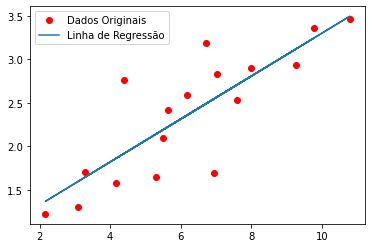

Custo Final em Teste: 0.079256654
Diferença Média Quadrada Absoluta: 0.0022665784


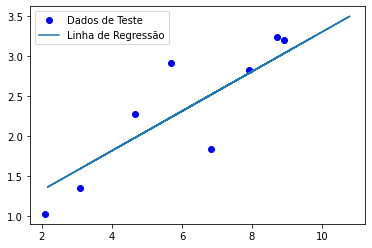

In [6]:
# Definindo a inicialização das variáveis
init = tf.global_variables_initializer()
 
# Iniciando a sessão
with tf.Session() as sess:
    # Iniciando as variáveis
    sess.run(init)
 
    # Treinamento do modelo
    for epoch in range(training_epochs):
 
        # Otimização com Gradient Descent
        sess.run(optimizer, feed_dict={X: train_X, y: train_y})
         
        # Display de cada epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, y: train_y})
            print("Epoch:{0:6} \t Custo (Erro):{1:10.4} \t W:{2:6.4} \t b:{3:6.4}".format(epoch+1, c, sess.run(W), sess.run(b)))
             
    # Imprimindo os parâmetros finais do modelo
    print("\nOtimização Concluída!")
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
    print("Custo Final de Treinamento:", training_cost, " - W Final:", sess.run(W), " - b Final:", sess.run(b), '\n')
     
    # Visualizando o resultado
    plt.plot(train_X, train_y, 'ro', label='Dados Originais')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()
 
    # Testando o modelo
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]), 
                            feed_dict={X: test_X, y: test_y})
     
    print("Custo Final em Teste:", testing_cost)
    print("Diferença Média Quadrada Absoluta:", abs(training_cost - testing_cost))
 
    # Display em Teste
    plt.plot(test_X, test_y, 'bo', label='Dados de Teste')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()
    
sess.close()

A cada grupo de passadas o modelo vai diminuindo sua taxa de erros, o que o indica que o modelo está aprendendo.